<a href="https://colab.research.google.com/github/rida-manzoor/DL/blob/main/24_Stacked_RNN%2C_Bi_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep RNN

### What is Deep Recurrent Neural Networks (RNNs)?

Deep Recurrent Neural Networks (Deep RNNs) are an extension of traditional Recurrent Neural Networks (RNNs) that incorporate multiple layers of recurrent units. These networks are designed to capture hierarchical representations of sequential data and learn complex patterns across multiple time scales.

### Why do we need Deep RNNs?

Deep RNNs address the limitations of shallow RNN architectures in capturing complex and hierarchical dependencies in sequential data. By adding multiple layers, Deep RNNs can learn more abstract and high-level features, allowing them to model intricate patterns and long-range dependencies in sequences.

### How do Deep RNNs work?

1. **Architecture:**

  ![dop](https://d2l.ai/_images/deep-rnn.svg)

   - Deep RNNs consist of multiple recurrent layers stacked on top of each other.
   - Each layer processes the input sequence sequentially and passes its output to the next layer.
   - The final layer's output is often used for making predictions or further processing.

2. **Mathematical Representation:**
   $$
   h_t^{(l)} = f(W^{(l)} h_{t-1}^{(l)} + U^{(l)} x_t + b^{(l)})
   $$
   where:
   - \( h_t^{(l)} \) is the hidden state of layer \( l \) at time step \( t \),
   - \( f \) is the activation function,
   - \( W^{(l)} \) and \( U^{(l)} \) are the weight matrices,
   - \( b^{(l)} \) is the bias vector,
   - \( x_t \) is the input at time step \( t \).

3. **Training:**
   - Training Deep RNNs involves optimizing the network parameters (weights and biases) using backpropagation through time (BPTT).
   - Gradient descent algorithms, such as Adam or RMSprop, are commonly used for optimization.

4. **Applications:**
   - Deep RNNs find applications in various domains, including natural language processing (NLP), speech recognition, time series analysis, and generative modeling.
   - They excel at capturing long-range dependencies and learning hierarchical representations from sequential data.

**Number of Layers:** The number of layers is a hyperparameter of stacked RNN model that can be tuned based on the complexity of the task. More number of stacks can capture more intricate patterns. But be cautious during selecting number of layers because more layers may require more training data and longer training times. If your data sequence is short then don’t use more that 2-3 layers because un-necessarily extra training time may lead to make your model un-optimized.

**Dropout and Regularization:** Stacked RNNs are not proofed from model overfitting problem. To prevent this problem, Stacked RNNs have dropout and regularization techniques which can be applied between RNN layers. This helps to improve the generalization ability of the model.

**Layer Types:** Stacked RNNs generally has three types of layer options which are vanilla RNNs, LSTMs and GRUs. Most popular layers are LSTM and GRU as they can handle long-term dependencies and mitigate the vanishing gradient problem.

In summary, Deep RNNs offer a powerful framework for modeling and understanding complex sequential patterns, making them a valuable tool in the field of deep learning.

In [2]:
# importing libraties
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt


In [3]:
max_features = 10000
maxlen = 80
batch_size = 32
# Load the IMDb dataset using Keras's built-in function, limiting the vocabulary to 'max_features' most frequent words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)


17464789/17464789 [==============================] - 0s 0us/step


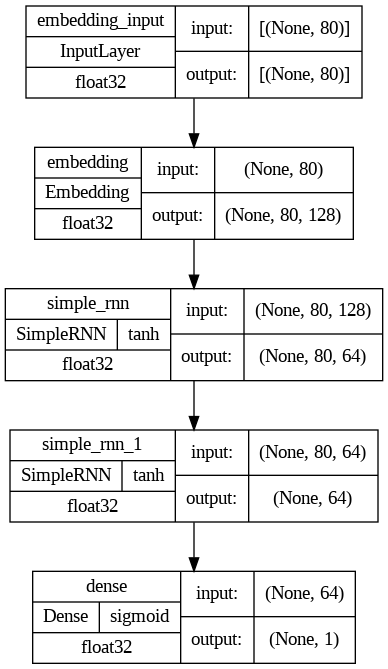

In [4]:
# Building the stacked Simple RNN model
# a Sequential model to build the neural network
model = Sequential()

# Embedding layer to convert integer-encoded words into dense vectors
model.add(Embedding(max_features, 128, input_length=maxlen))

# the first RNN layer
model.add(SimpleRNN(64, return_sequences=True))

# the second RNN layer
model.add(SimpleRNN(64))

# dense layer(fully connected)
model.add(Dense(1, activation='sigmoid'))


#model Summary
tf.keras.utils.plot_model(model, show_shapes = True,
						to_file='stacked_rnn_model.png',
						show_dtype = True,
						show_layer_activations = True)


In [5]:
# Compile the model
model.compile(loss='binary_crossentropy',
			optimizer='adam',
			metrics=['accuracy'])

# Train the model
history = model.fit(x_train,
					y_train,
					batch_size=batch_size,
					epochs=5,
					validation_data=(x_test, y_test))


Epoch 1/5
782/782 [==============================] - 64s 79ms/step - loss: 0.5434 - accuracy: 0.7071 - val_loss: 0.4908 - val_accuracy: 0.7969
Epoch 2/5
782/782 [==============================] - 56s 71ms/step - loss: 0.3915 - accuracy: 0.8270 - val_loss: 0.4668 - val_accuracy: 0.8111
Epoch 3/5
782/782 [==============================] - 56s 72ms/step - loss: 0.2259 - accuracy: 0.9132 - val_loss: 0.5068 - val_accuracy: 0.7942
Epoch 4/5
782/782 [==============================] - 55s 71ms/step - loss: 0.1143 - accuracy: 0.9597 - val_loss: 0.6660 - val_accuracy: 0.7810
Epoch 5/5
782/782 [==============================] - 57s 72ms/step - loss: 0.1349 - accuracy: 0.9454 - val_loss: 0.6990 - val_accuracy: 0.7820


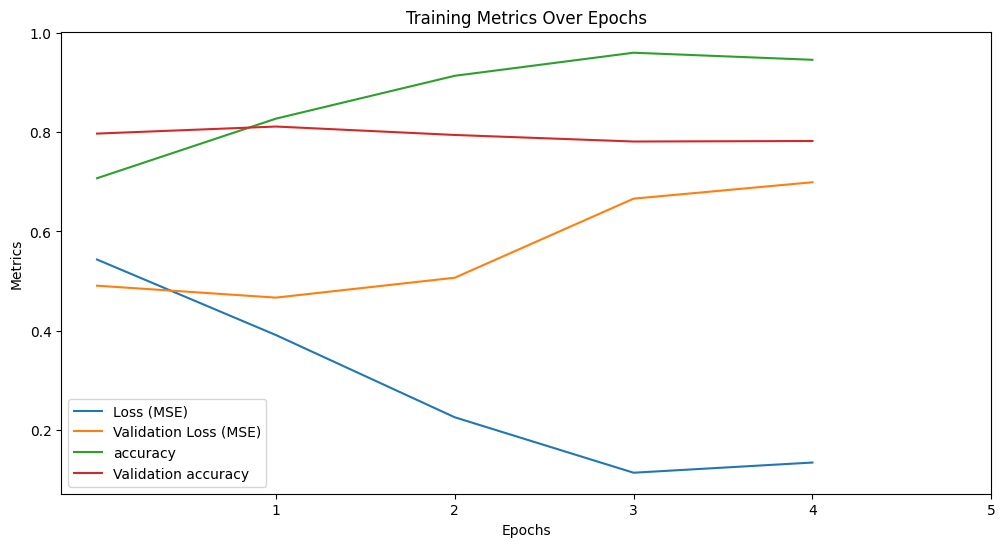

In [6]:
# Plotting the training metrics
plt.figure(figsize=(12, 6))

# Plot Mean Squared Error
plt.plot(history.history['loss'], label='Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')

# Plot accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.xticks(range(1, len(history.history['loss']) + 1))
plt.legend()
plt.title('Training Metrics Over Epochs')
plt.grid(False)

plt.savefig('Plots_of_stacked_rnn.png')
plt.show()


In [7]:
# Evaluate the model on the test data
loss, accuracy= model.evaluate(x_test, y_test)

# Print the evaluation results
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


782/782 [==============================] - 9s 11ms/step - loss: 0.6990 - accuracy: 0.7820
Test Loss: 0.6989909410476685
Test Accuracy: 0.7820000052452087


# Bidirectional RNN

Bidirectional Recurrent Neural Networks (Bidirectional RNNs) are a type of RNN architecture that processes input sequences in both forward and backward directions. This allows the network to capture information from past and future contexts simultaneously, enhancing its ability to understand context and make predictions.

![birnn](https://miro.medium.com/v2/resize:fit:720/format:webp/1*6QnPUSv_t9BY9Fv8_aLb-Q.png)


### Why do we need Bidirectional RNNs?

Bidirectional RNNs address the limitation of traditional RNNs in only considering past context during prediction. By incorporating information from both past and future contexts, Bidirectional RNNs can capture dependencies and patterns that may not be evident when processing sequences in a single direction.

### How do Bidirectional RNNs work?

1. **Architecture:**
   - Bidirectional RNNs consist of two separate RNNs: one processes the input sequence in the forward direction, and the other processes it in the backward direction.
   - Each RNN layer produces outputs at each time step based on both past and future information.

2. **Mathematical Representation:**

   Forward RNN:
   $$
   \overrightarrow{h_t} = f(W^{(f)} \overrightarrow{h_{t-1}} + U^{(f)} x_t + b^{(f)})
   $$
   Backward RNN:
   $$
   \overleftarrow{h_t} = f(W^{(b)} \overleftarrow{h_{t+1}} + U^{(b)} x_t + b^{(b)})
   $$
   Combined output at time step \( t \):
   $$
   h_t = [\overrightarrow{h_t}; \overleftarrow{h_t}]
   $$
   where:
   - $ \overrightarrow{h_t} $ and $ \overleftarrow{h_t} $ are the hidden states in the forward and backward directions, respectively.
   - \( f \) is the activation function.
   - $ W^{(f)} $, $ W^{(b)} $, $ U^{(f)} $, $ U^{(b)} $ are the weight matrices, and $ b^{(f)} $, $ b^{(b)} $ are the bias vectors.

3. **Training and Applications:**
   - Bidirectional RNNs are trained using backpropagation through time (BPTT) similar to traditional RNNs.
   - They are used in tasks where understanding context from both directions is beneficial, such as speech recognition, named entity recognition in NLP, and time series analysis.

Bidirectional RNNs offer a comprehensive approach to sequence modeling by leveraging information from past and future contexts, making them effective for tasks requiring context-aware predictions.

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, GRU,Embedding,SimpleRNN
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [9]:
# Load IMDB Dataset
num_words=10000 #Number of words to keep
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

In [10]:
# Pad Sequence
max_length = 100 # Maximum sequence length
x_train = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')

In [11]:
embedding_dim = 32 # Embedding dimension

model=Sequential()
model.add(Embedding(input_dim=num_words,output_dim=embedding_dim,input_length=max_length))
model.add(SimpleRNN(5))
model.add(Dense(1,activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 32)           320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 5)                 190       
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 320196 (1.22 MB)
Trainable params: 320196 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [14]:
embedding_dim = 32 # Embedding dimension

model=Sequential()
model.add(Embedding(input_dim=num_words,output_dim=embedding_dim,input_length=max_length))
model.add(Bidirectional(SimpleRNN(5)))
model.add(Dense(1,activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 32)           320000    
                                                                 
 bidirectional (Bidirection  (None, 10)                380       
 al)                                                             
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 320391 (1.22 MB)
Trainable params: 320391 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
embedding_dim = 32 # Embedding dimension

model=Sequential()
model.add(Embedding(input_dim=num_words,output_dim=embedding_dim,input_length=max_length))
model.add(Bidirectional(LSTM(5)))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 32)           320000    
                                                                 
 bidirectional_1 (Bidirecti  (None, 10)                1520      
 onal)                                                           
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 321531 (1.23 MB)
Trainable params: 321531 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
embedding_dim = 32 # Embedding dimension

model=Sequential()
model.add(Embedding(input_dim=num_words,output_dim=embedding_dim,input_length=max_length))
model.add(Bidirectional(GRU(5)))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 32)           320000    
                                                                 
 bidirectional_2 (Bidirecti  (None, 10)                1170      
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 321181 (1.23 MB)
Trainable params: 321181 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Applications
* NER
* POS Tagging
* Machine Translation
* Sentiment Analysis
* Time Series Forecasting

# Drawbacks
* Complexity
* Slow Latency in real time scenerios

# References
* https://towardsdatascience.com/understanding-bidirectional-rnn-in-pytorch-5bd25a5dd66
* https://d2l.ai/chapter_recurrent-modern/bi-rnn.html
